In [72]:
import ast
import pandas as pd

def convert_to_list(s):
    return ast.literal_eval(s)

# DataFrameの読み込み
df = pd.read_csv('../results/output_compress.csv', converters={'memory_usage_ma': convert_to_list, 'elapsed_time_lz78': convert_to_list})
# df['bytes_per_character'] = df['memory_usage_cdawg'] / df['memory_usage_text']
# df['edges_per_character'] = df['num_edges'] / df['text_length']
# df['memory_usage_cdawg'] /= 1024.0 * 1024.0
# df['memory_usage_ma'] /= 1024.0 * 1024.0
df['memory_usage_ma_average'] = df['memory_usage_ma'].apply(lambda x: sum(x) / len(x)) / 1024.0 / 1024.0
df['elapsed_time_lz78_average'] = df['elapsed_time_lz78'].apply(lambda x: sum(x) / len(x)) / 1e6
df

,filename,text_length,num_iter,substr_length,memory_usage_ma,elapsed_time_lz78,memory_usage_ma_average,elapsed_time_lz78_average
0,sources,134217728,10,8,"[768, 672, 432, 720, 720, 816, 624, 336, 768, ...","[155, 94, 134, 115, 114, 101, 122, 132, 121, 90]",0.000618,0.000118
1,sources,134217728,10,16,"[1344, 1392, 1056, 1104, 1248, 1344, 1248, 100...","[173, 214, 248, 230, 185, 183, 202, 151, 188, ...",0.001140,0.000190
2,sources,134217728,10,32,"[1920, 2208, 1872, 2112, 2016, 1776, 2160, 192...","[331, 322, 332, 301, 265, 290, 290, 328, 388, ...",0.001895,0.000311
3,sources,134217728,10,64,"[3792, 3744, 2976, 3312, 3600, 2688, 3600, 297...","[586, 555, 451, 487, 610, 439, 633, 465, 1197,...",0.003186,0.000592
4,sources,134217728,10,128,"[3648, 6432, 5856, 4176, 4992, 6192, 4080, 590...","[732, 1029, 1025, 773, 908, 1353, 1090, 1169, ...",0.005141,0.001040
...,...,...,...,...,...,...,...,...
70,english,134217728,3,8388608,"[80776896, 81520320, 81051600]","[28833691, 29434975, 30196779]",77.358505,29.488482
71,english,134217728,3,16777216,"[141919488, 140101968, 144927840]","[58452250, 57213310, 57858680]",135.723526,57.841413
72,english,134217728,3,33554432,"[261102912, 259007616, 261105264]","[113744121, 113961769, 109831617]",248.341812,112.512502
73,english,134217728,3,67108864,"[464573136, 467010432, 466836048]","[217237390, 217106897, 213102998]",444.545624,215.815762


   filename  text_length  num_vertices  num_edges  memory_usage_text  \
24  sources    134217728      19702980   66327855          134217728   
49      dna    134217728      68397775  178908741          134217728   
74  english    134217728      30487059  102211137          134217728   

    memory_usage_cdawg  memory_usage_ma  elapsed_time_lz78  \
24          1032370024        673228272           365525.0   
49          2967678196        538515120           370265.0   
74          1592378356        808343664           468631.0   

                                        num_iter_bins  
24  [0, 0, 427, 33043, 386462, 1661179, 4088759, 7...  
49  [0, 2, 23, 151, 448, 1482, 1823, 1288, 1090, 1...  
74  [0, 7, 1959, 21769, 143751, 675615, 1971478, 4...  


/tmp/ipykernel_168289/2173646091.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


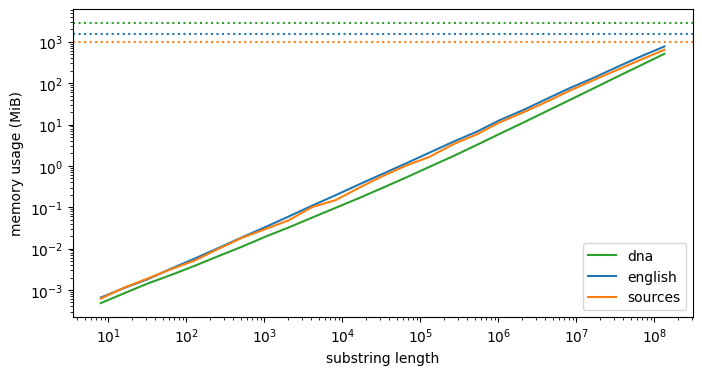

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np

filenames = ['sources', 'dna', 'english']
colors = { 'sources': 'tab:orange', 'dna': 'tab:green', 'english': 'tab:blue' }
lengths = [1 << x for x in range(3, 27)]

df_construct = pd.read_csv('../results/output_construct.csv', converters={'num_iter_bins': convert_to_list})

memory_usage_cdawg = df_construct[df_construct.text_length == df_construct.text_length.max()].groupby('filename')['memory_usage_cdawg'].mean() / 1024.0 / 1024.0

df_g = df.groupby('filename')

fig, ax = plt.subplots(figsize=(8, 4))
for filename, sub_df in df_g:
    # plot the graph of memory_usage_ma_average
    # set ax as log_scale
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=10)
        
    # write horizontal bar indicates memory_usage_cdawg
    ax.axhline(y=memory_usage_cdawg[filename], linestyle=':', color=colors[filename])
    ax.plot(sub_df['substr_length'], sub_df['memory_usage_ma_average'], label=filename, color=colors[filename])
ax.set_xlabel('substring length')
ax.set_ylabel('memory usage (MiB)')
ax.legend()
fig.savefig(f'../results/elapsed_time.pdf')
fig.show()


/tmp/ipykernel_168289/3527985125.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


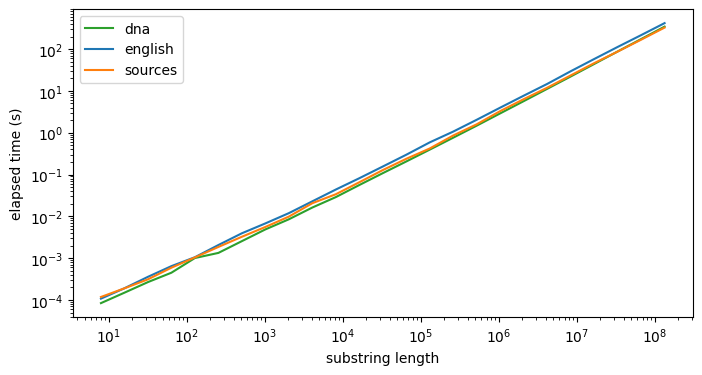

In [74]:

fig, ax = plt.subplots(figsize=(8, 4))
for filename, sub_df in df_g:
    # plot the graph of memory_usage_ma_average
    # set ax as log_scale
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=10)

    ax.plot(sub_df['substr_length'], sub_df['elapsed_time_lz78_average'], label=filename, color=colors[filename])
    # ax.plot(df['substr_length'], df['memory_usage_ma_average'], label=filename)
ax.set_xlabel('substring length')
ax.set_ylabel('elapsed time (s)')
ax.legend()
fig.savefig(f'../results/memory_usage_ma.pdf')
fig.show()